In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, mean_squared_error
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score

pd.options.display.max_columns = 99

# Thrown out datasets

In [279]:
# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect(r'C:\Users\Dask\Downloads\database.sqlite')
df = pd.read_sql_query("SELECT * from MATCH", con)

con.close()

In [280]:
df.head(3)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,...,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.4,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.8,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.2,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.9,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.3,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.5,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.5,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75


In [281]:
df_2021 = pd.read_table(r'C:\Users\Dask\Downloads\soccer_df.csv', sep = '\,')

C:\Users\Dask\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [282]:
df_2021.head(5)

,"""",Unnamed: 1,Home,Home.1,Home.2,Home.3,Home.4,Home.5,Home.6,Home.7,Home.8,Home.9,Home.10,Home.11,Home.12,Away,Away.1,Away.2,Away.3,Away.4,Away.5,Away.6,Away.7,Away.8,Away.9,Away.10,Away.11,"Away"""
0,"""Rk",Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,"xGD/90"""
1,"""1",Manchester City,11,9,1,1,32,6,+26,28,2.55,26.1,6.3,+19.8,+1.80,12,9,2,1,23,8,+15,29,2.42,25.4,9.7,+15.7,"+1.31"""
2,"""2",Liverpool,10,7,3,0,25,6,+19,24,2.40,25.0,7.3,+17.7,+1.77,12,7,3,2,33,13,+20,24,2.00,29.1,15.7,+13.4,"+1.12"""
3,"""3",Chelsea,12,6,5,1,27,10,+17,23,1.92,23.1,11.2,+11.8,+0.99,12,7,3,2,21,8,+13,24,2.00,17.8,10.9,+6.9,"+0.57"""
4,"""4",Manchester Utd,11,6,1,4,18,15,+3,19,1.73,16.5,13.6,+3.0,+0.27,11,5,4,2,18,15,+3,19,1.73,15.4,19.3,-4.0,"-0.36"""


# MLS Salary Datasets

In [283]:
df_salaries2007 = pd.read_csv(r'C:\Users\Dask\Downloads\data\mls-salaries-2007.csv')
df_salaries2008 = pd.read_csv(r'C:\Users\Dask\Downloads\data\mls-salaries-2008.csv')
df_salaries2009 = pd.read_csv(r'C:\Users\Dask\Downloads\data\mls-salaries-2009.csv')
df_salaries2010 = pd.read_csv(r'C:\Users\Dask\Downloads\data\mls-salaries-2010.csv')
df_salaries2011 = pd.read_csv(r'C:\Users\Dask\Downloads\data\mls-salaries-2011.csv')
df_salaries2012 = pd.read_csv(r'C:\Users\Dask\Downloads\data\mls-salaries-2012.csv')
df_salaries2013 = pd.read_csv(r'C:\Users\Dask\Downloads\data\mls-salaries-2013.csv')
df_salaries2014 = pd.read_csv(r'C:\Users\Dask\Downloads\data\mls-salaries-2014.csv')
df_salaries2015 = pd.read_csv(r'C:\Users\Dask\Downloads\data\mls-salaries-2015.csv')
df_salaries2016 = pd.read_csv(r'C:\Users\Dask\Downloads\data\mls-salaries-2016.csv')
df_salaries2017 = pd.read_csv(r'C:\Users\Dask\Downloads\data\mls-salaries-2017.csv')

In [284]:
df_salaries = pd.concat([df_salaries2007, df_salaries2008, df_salaries2009, df_salaries2010, df_salaries2011, df_salaries2012, df_salaries2013, df_salaries2014, df_salaries2015, df_salaries2016, df_salaries2017,])

In [285]:
df_salaries = df_salaries[['club', 'position', 'guaranteed_compensation']]

In [286]:
df_salaries

,club,position,guaranteed_compensation
0,CHI,M,225000.00
1,CHI,M,12900.00
2,CHI,F,48712.50
3,CHI,F,2666778.00
4,CHI,D,106391.00
...,...,...,...
611,VAN,GK,80000.00
612,VAN,D,368125.00
613,VAN,D,184000.00
614,NaN,F,54075.00


# Dummified positions colum for modeling

In [287]:
df = pd.get_dummies(df_salaries['position'], drop_first = True)
df['guaranteed_compensation'] = df_salaries['guaranteed_compensation']

In [288]:
df

,D-F,D-M,D/F,D/M,F,F-D,F-M,F/M,GK,M,M-D,M-F,M/D,M/F,MF,guaranteed_compensation
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,225000.00
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,12900.00
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,48712.50
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2666778.00
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,106391.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,80000.00
612,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,368125.00
613,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184000.00
614,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,54075.00


# Calculating averages for visual

In [289]:
#Average overall salary 2007-20017

In [290]:
avg_salary = np.round(df['guaranteed_compensation'].mean(), 2)
avg_salary

210001.7

In [291]:
#Average player salary per year

In [292]:
print(np.round(df_salaries2007['guaranteed_compensation'].mean(), 2))
print(np.round(df_salaries2008['guaranteed_compensation'].mean(), 2))
print(np.round(df_salaries2009['guaranteed_compensation'].mean(), 2))
print(np.round(df_salaries2010['guaranteed_compensation'].mean(), 2))
print(np.round(df_salaries2011['guaranteed_compensation'].mean(), 2))
print(np.round(df_salaries2012['guaranteed_compensation'].mean(), 2))
print(np.round(df_salaries2013['guaranteed_compensation'].mean(), 2))
print(np.round(df_salaries2014['guaranteed_compensation'].mean(), 2))
print(np.round(df_salaries2015['guaranteed_compensation'].mean(), 2))
print(np.round(df_salaries2016['guaranteed_compensation'].mean(), 2))
print(np.round(df_salaries2017['guaranteed_compensation'].mean(), 2))

113810.4
115347.58
133706.32
173491.42
162056.14
179165.85
165066.22
226454.26
291933.35
316777.33
326139.23


In [293]:
#Average sallary by position per year

In [294]:
print(df_salaries2007.groupby('position').mean())
print(df_salaries2008.groupby('position').mean())
print(df_salaries2009.groupby('position').mean())
print(df_salaries2010.groupby('position').mean())
print(df_salaries2011.groupby('position').mean())
print(df_salaries2012.groupby('position').mean())
print(df_salaries2013.groupby('position').mean())
print(df_salaries2014.groupby('position').mean())
print(df_salaries2015.groupby('position').mean())
print(df_salaries2016.groupby('position').mean())
print(df_salaries2017.groupby('position').mean())

            base_salary  guaranteed_compensation
position                                        
D          66842.508673             71703.988265
D-F        30870.000000             30870.000000
D-M        85050.000000             94050.000000
F         147652.974146            160188.837927
F-D        12900.000000             12900.000000
F-M        34925.000000             34925.000000
GK         56502.345349             58607.723256
M         127843.378926            143353.548843
M-D        99233.333333            107433.333333
M-F        71745.300000             89695.300000
            base_salary  guaranteed_compensation
position                                        
D          69087.578333             74792.592222
F         123219.502791            134916.219651
GK         55478.261667             58147.811458
M         139764.191933            156498.351667
            base_salary  guaranteed_compensation
position                                        
D          76428.748

In [295]:
#Salary dataframe

In [296]:
data = {'Year':[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
    'AVG':[113810, 115347, 133706, 173491, 162056, 179165, 165066, 226454, 291933, 316777, 326139],
    'Forward':[160188, 134196, 156682, 249104, 273803, 263068, 279888, 368800, 419773, 591829, 557437],
    'Defender':[71703, 74792, 83551, 140693, 127314, 152728, 119576, 142690, 165855, 171177, 179533],
    '2007-17avg':[210000, 210000, 210000, 210000, 210000, 210000, 210000, 210000, 210000, 210000, 210000]}
df_years = pd.DataFrame(data, columns = ['Year', 'AVG', 'Forward', 'Defender', '2007-17avg'])
df_years = df_years.set_index('Year')
df_years

,AVG,Forward,Defender,2007-17avg
Year,,,,
2007,113810,160188,71703,210000
2008,115347,134196,74792,210000
2009,133706,156682,83551,210000
2010,173491,249104,140693,210000
2011,162056,273803,127314,210000
2012,179165,263068,152728,210000
2013,165066,279888,119576,210000
2014,226454,368800,142690,210000
2015,291933,419773,165855,210000


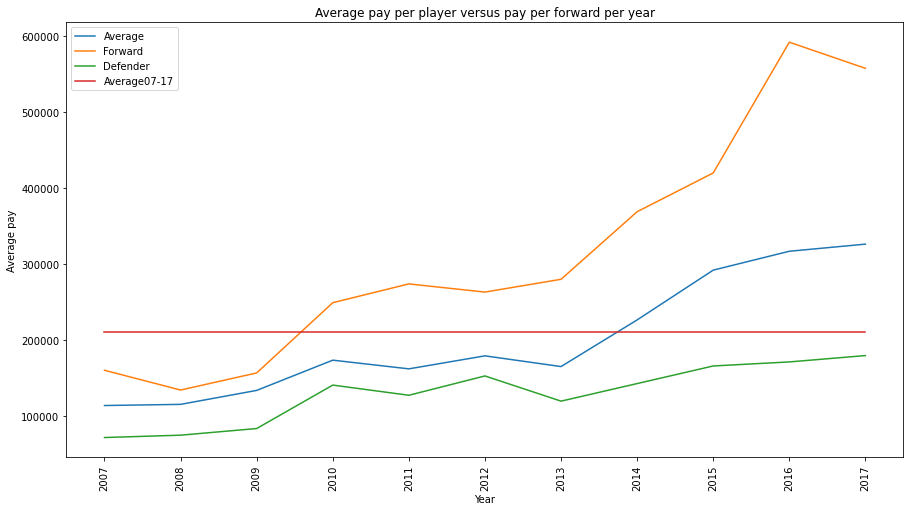

In [297]:
plt.figure(figsize=(15,8))
plt.plot(df_years)
plt.title('Average pay per player versus pay per forward per year')
plt.xlabel('Year')
plt.ylabel('Average pay');
plt.xticks(ticks = range(2007, 2018), labels = range(2007, 2018))
plt.xticks(rotation=90)
plt.legend(['Average', 'Forward', 'Defender', 'Average07-17']);

In [298]:
#Data cleaning for models

In [299]:
df.dropna(inplace = True)

In [300]:
df.isnull().sum()

D-F                        0
D-M                        0
D/F                        0
D/M                        0
F                          0
F-D                        0
F-M                        0
F/M                        0
GK                         0
M                          0
M-D                        0
M-F                        0
M/D                        0
M/F                        0
MF                         0
guaranteed_compensation    0
dtype: int64

In [301]:
# X,y for models

In [302]:
X = df.drop(columns = ['guaranteed_compensation'])
y = df['guaranteed_compensation']

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [304]:
#Linear Regression Model

In [305]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.016380799522765277, 0.019054639406652973)

In [306]:
#K nearest neighbors model

In [307]:
knr = KNeighborsRegressor(n_neighbors=50)
knr.fit(X_train, y_train)
knr.score(X_train, y_train), knr.score(X_test, y_test)

(0.011007377763975645, 0.013621689841931461)

In [308]:
#Decision Tree model

In [309]:
dtr = DecisionTreeRegressor(max_depth=4)
dtr.fit(X_train, y_train)
dtr.score(X_train, y_train), dtr.score(X_test, y_test)

(0.016006933620579367, 0.018724690310945036)

In [310]:
# Bagged model

In [311]:
br = BaggingRegressor(n_estimators=50)
br.fit(X_train, y_train)
br.score(X_train, y_train), br.score(X_test, y_test)

(0.016360868759109803, 0.019037487367722372)

In [312]:
# Random Forest model

In [313]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr.score(X_train, y_train), rfr.score(X_test, y_test)

(0.01636676968597217, 0.018861303836173904)

In [314]:
# Supper vector model

In [315]:
svr = SVR()
svr.fit(X_train, y_train)
svr.score(X_train, y_train), svr.score(X_test, y_test)

(-0.040816346142552806, -0.03933425890349462)